In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image

from PlotsForPaper_Functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import sys
sys.path.append("ProcessModelResults/")
from my_functions import *

In [3]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

## Plot catchments

In [4]:
catchment_name = 'LinDyke'

In [5]:
sys.path.append("../")
from my_functions import *

if catchment_name == 'LinDyke':
    catchment_name_str = "Resampled.Terrain" 
    catchment_shpfilename = 'CatchmentLinDyke_exported'
    minx, miny, maxx, maxy  = 437000,  426500,  445500, 434300
    
elif catchment_name == 'WykeBeck':
    catchment_name_str = "Terrain.wykeDEM" 
    catchment_shpfilename = 'WykeBeckCatchment'
    minx, miny, maxx, maxy = 430004,  429978, 438660, 440996
    
# Create a bounding box (this is used in preparing the rasters)
bbox = box(minx, miny, maxx, maxy)

In [6]:
# n_flooded_cells_dict_2mins = {}
# for method in ['6h_sp_bl_0.6', '6h_sp_bl_0.9']:
#     print(method)
#     n_flooded_cells_2mins = []
#     dates = []
#     Hs=range(12,24)
#     Ms= range(1,61,2)
#     for H in Hs:
#         for M in Ms:
#             M = str(M).zfill(2)
#             dates.append('{} {}'.format(H,M))
#             fp = '../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (01AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, H, M)
#             try:
#                 depth_timeslice = prepare_rainfall_scenario_raster(fp, bbox, remove_little_values)[0]
#                 n_flooded_cells_2mins.append(depth_timeslice.size - np.count_nonzero(np.isnan(depth_timeslice)))
#             except:
#                 print(fp)
#     # Add to dict
#     n_flooded_cells_dict_2mins[method] = n_flooded_cells_2mins

In [7]:
test_dict_5mins = {}
for method in methods_dict['Idealised']:
    print(method)
    n_flooded_cells_5mins = []
    Hs=range(0,24)
    M = 0
    for day in [2,3]:
        for H in Hs:
                M = str(M).zfill(2)
                H = str(H).zfill(2)
                fp = '../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (0{}AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, day, H, M)
                try:
                    depth_timeslice = prepare_rainfall_scenario_raster(fp, bbox, remove_little_values)[0]
                    n_flooded_cells_5mins.append(depth_timeslice.size - np.count_nonzero(np.isnan(depth_timeslice)))                    
                except:
                    print(fp)
        # Add to dict
        test_dict_5mins[method] = n_flooded_cells_5mins


6h_sp_fl_0.1
6h_sp_fl_0.2
6h_sp_fl_0.3
6h_sp_fl_0.4
6h_sp_c_0.5
6h_sp_bl_0.6
6h_sp_bl_0.7
6h_sp_bl_0.8
6h_sp_bl_0.9


In [ ]:
n_flooded_cells_dict_5mins = {}
for method in ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4', '6h_sp_c_0.5', '6h_sp_bl_0.7','6h_sp_bl_0.8']:
    print(method)
    n_flooded_cells_5mins = []
    Hs=range(12,24)
    Ms= range(0,60,5)
    for H in Hs:
        for M in Ms:
            if H == 12 and M == 0:
                pass
            else:
                M = str(M).zfill(2)
                fp = '../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (01AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, H, M)
                try:
                    depth_timeslice = prepare_rainfall_scenario_raster(fp, bbox, remove_little_values)[0]
                    n_flooded_cells_5mins.append(depth_timeslice.size - np.count_nonzero(np.isnan(depth_timeslice)))                    
                except:
                    print(fp)
    # Add to dict
    n_flooded_cells_dict_5mins[method] = n_flooded_cells_5mins


6h_sp_fl_0.1
6h_sp_fl_0.2
6h_sp_fl_0.3
6h_sp_fl_0.4
6h_sp_c_0.5
6h_sp_bl_0.7
6h_sp_bl_0.8


In [10]:
# df_2mins = pd.DataFrame(n_flooded_cells_dict_2mins)
# df_5mins = pd.DataFrame(n_flooded_cells_dict_5mins)
df_test = pd.DataFrame(test_dict_5mins)

# df_2mins.to_csv("df_2mins.csv",index=False)
# df_5mins.to_csv()
df_test.to_csv("df_test.csv",index=False)

In [11]:
# df_2mins['minute']= list(range(1,len(df_2mins)*2,2))
# df_5mins['minute']= list(range(0,len(df_5mins)*5,5))
df_test['minute']= list(range(720,(len(df_test)*60)+720,60))

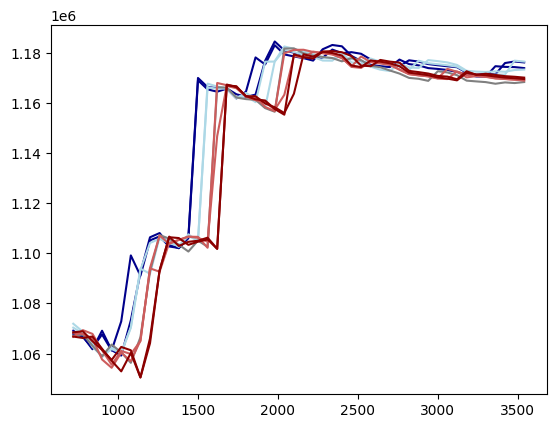

In [12]:
fig, ax = plt.subplots()

colors_2mins = ['indianred', 'darkred']
colors_5mins = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','darkred' ]
colors_test = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','indianred','darkred','darkred' ]

# for number, column in enumerate(df_5mins.columns[:-1]):
#       ax.plot(df_5mins["minute"], df_5mins[column], color = colors_5mins[number]);           
        
# for number, column in enumerate(df_2mins.columns[:-1]):
#       ax.plot(df_2mins["minute"], df_2mins[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test.columns[:-1]):
      ax.plot(df_test["minute"], df_test[column], color = colors_test[number]);          